Skipping Dataset2/Brain/.ipynb_checkpoints: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`
Total samples: 80 | Features per sample: 512
Train samples: 64 | Test samples: 16
=== SVM ===
Accuracy: 1.00
              precision    recall  f1-score   support

       Brain       1.00      1.00      1.00         4
        Lung       1.00      1.00      1.00         7
       Heart       1.00      1.00      1.00         5

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



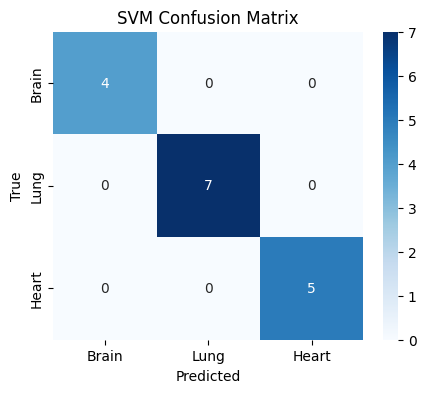

SVM Confusion Matrix:
[[4 0 0]
 [0 7 0]
 [0 0 5]]

=== Random Forest ===
Accuracy: 0.88
              precision    recall  f1-score   support

       Brain       1.00      0.50      0.67         4
        Lung       1.00      1.00      1.00         7
       Heart       0.71      1.00      0.83         5

    accuracy                           0.88        16
   macro avg       0.90      0.83      0.83        16
weighted avg       0.91      0.88      0.86        16



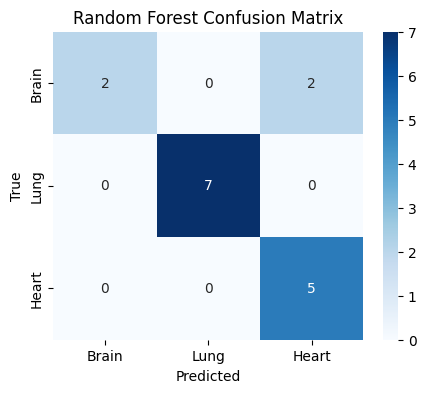

Random Forest Confusion Matrix:
[[2 0 2]
 [0 7 0]
 [0 0 5]]

=== k-NN ===
Accuracy: 0.94
              precision    recall  f1-score   support

       Brain       1.00      0.75      0.86         4
        Lung       1.00      1.00      1.00         7
       Heart       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.94      0.92      0.92        16
weighted avg       0.95      0.94      0.94        16



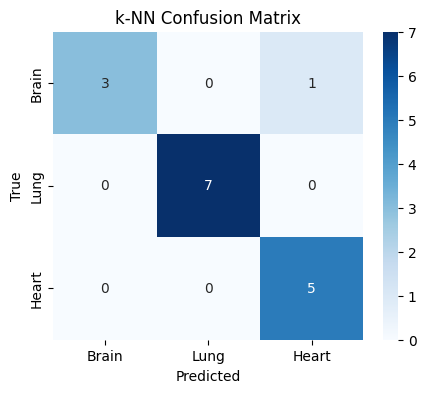

k-NN Confusion Matrix:
[[3 0 1]
 [0 7 0]
 [0 0 5]]

=== Logistic Regression ===
Accuracy: 1.00
              precision    recall  f1-score   support

       Brain       1.00      1.00      1.00         4
        Lung       1.00      1.00      1.00         7
       Heart       1.00      1.00      1.00         5

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



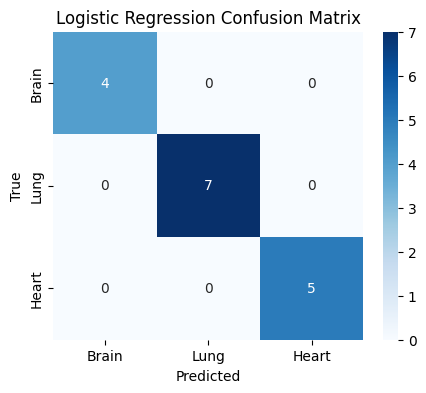

Logistic Regression Confusion Matrix:
[[4 0 0]
 [0 7 0]
 [0 0 5]]



In [2]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Settings ---
dataset_path = 'Dataset2/'
classes = ['Brain', 'Lung', 'Heart']
img_size = (128, 128)

# --- 2. Feature extraction ---
def extract_features_labels():
    features = []
    labels = []
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = imread(img_path)
                img = resize(img, img_size)
                if len(img.shape) == 3:
                    img_gray = np.mean(img, axis=2)
                else:
                    img_gray = img
                hog_feat = hog(img_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
                features.append(hog_feat)
                labels.append(class_idx)
            except Exception as e:
                print(f"Skipping {img_path}: {e}")
    return np.array(features), np.array(labels)

# --- 3. Load data ---
X, y = extract_features_labels()
print(f"Total samples: {len(X)} | Features per sample: {X.shape[1]}")

# --- 4. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")

# --- 5. SVM ---
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# --- 6. Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- 7. k-Nearest Neighbors ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# --- 8. Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# --- 9. Accuracy matrices ---
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()
    return cm

def print_and_plot(model_name, y_test, y_pred):
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred, target_names=classes))
    cm = plot_confusion_matrix(y_test, y_pred, classes, f"{model_name} Confusion Matrix")
    print(f"{model_name} Confusion Matrix:\n{cm}\n")
    return cm

cm_svm = print_and_plot("SVM", y_test, y_pred_svm)
cm_rf = print_and_plot("Random Forest", y_test, y_pred_rf)
cm_knn = print_and_plot("k-NN", y_test, y_pred_knn)
cm_logreg = print_and_plot("Logistic Regression", y_test, y_pred_logreg)